# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Khalishia Fira Haninda]
- **Email:** [firahnda@gmail.com]
- **ID Dicoding:** [firahnda]

## Menentukan Pertanyaan Bisnis

- Apa pengaruh cuaca terhadap jumlah penyewaan sepeda dalam sebulan tertentu?
- Bagaimana perbandingan jumlah penyewaan sepeda antara tahun 2011 dan 2012?
- Bagaimana hari kerja dan hari libur mempengaruhi jumlah penyewaan sepeda?
- Berapa rata-rata jumlah penyewaan sepeda di setiap musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import semua Package/Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca file hour.csv
hour_data = pd.read_csv('./data/hour.csv')

In [3]:
# Membaca file day.csv
data = pd.read_csv('./data/day.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
hour_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# Memeriksa nama kolom yang ada dalam dataset day.csv
print("Nama kolom dalam dataset day :", data.columns)

# Memeriksa nama kolom yang ada dalam dataset hour.csv
print("Nama kolom dalam dataset hour :", hour_data.columns)

Nama kolom dalam dataset day : Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Nama kolom dalam dataset hour : Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


**Insight:**
- Terdapat kolom tipe data numerik (int64 dan float64) dan kolom dengan tipe data objek yang menunjukkan bahwa dataset berisi kombinasi data numerik dan kategorikal
- Membantu dalam memahami struktur data dan variabel yang diukur dalam dataset

### Assessing Data

In [9]:
print(data.head())  # Menampilkan 5 baris pertama
print(data.info())  # Informasi umum tentang dataset
print(data.describe())  # Statistik deskriptif
print("Nama kolom dalam dataset day.csv :", data.columns)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [10]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada tahap Gathering Data, terdapat dua dataset bike yaitu day.csv dan hour.csv yang dikumpulkan dan dicek kembali menggunakan perintah .head() dan menggunakan .dtypes untuk mengecek tipe data yang digunakan.
- Kode menampilkan informasi dasar tentang dataset, seperti jumlah baris dan kolom, serta tipe data dari setiap kolom yang membantu dalam memahami struktur data dan variabel yang diukur dalam dataset.
- Kode menampilkan beberapa baris pertama dari dataset, yang memberikan gambaran awal tentang pola data. 
- Kode ini menunjukkan bahwa dataset berisi 731 entri dan 16 kolom, yang menunjukkan bahwa dataset ini cukup besar dan kompleks.  


### Cleaning Data 

In [11]:
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)

In [12]:
#Check for NaN values
print ("Number of NaN values in each column:")
print(data.isna().sum())

Number of NaN values in each column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
#Check for missing values
print("Number of missing values in each column:")
print(data.isnull().sum())

Number of missing values in each column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
duplicate_count = data.apply(lambda x: x.duplicated()).sum()
print("Duplicate count: ", duplicate_count)

Duplicate count:  instant         0
dteday          0
season        727
yr            729
mnth          719
holiday       729
weekday       724
workingday    729
weathersit    728
temp          232
atemp          41
hum           136
windspeed      81
casual        125
registered     52
cnt            35
dtype: int64


In [15]:
duplicate_count = len(data) - len(data.drop_duplicates())
print("Duplicate count: ", duplicate_count)

Duplicate count:  0


In [16]:
# Jika ada missing values, kita dapat mengisi dengan metode tertentu
# Misalnya kita bisa menggunakan metode forward fill
data.fillna(method='ffill', inplace=True)  # Mengisi missing values

C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\3890949648.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Mengisi missing values


In [17]:
# Memeriksa kembali setelah cleaning
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [18]:
datetime_columns = ["dteday"]
data[datetime_columns] = data[datetime_columns].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
data.rename(columns={
    'hour': 'hr',
    'year': 'yr',
    'month': 'mnth',
    'count': 'cnt'
}, inplace=True)

**Insight:**  
- Pada tahap selanjutnya yaitu Cleaning Data, missing value di-drop dan diganti dengan True dan Memeriksa apakah terdapat data duplikat dalam dataset dan hasilnya menunjukkan bahwa Duplicate count: 0, yang berarti tidak ada data duplikat dalam dataset. 
- Kode tersebut mencantumkan komentar tentang penanganan data yang hilang.
- Label pada beberapa kolom juga diubah untuk memudahkan pengolahan data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
data['season'] = data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [21]:
data['season'] = data.season.astype('category')

In [22]:
data.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\37853724.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by='season').agg({


cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

In [23]:
data['weekday'] = data['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

In [24]:
data.groupby(by='weekday').agg({'cnt': ['max', 'min', 'mean', 'sum']})

cnt                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

In [25]:
data['mnth'] = data['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [26]:
data['mnth'] = data.mnth.astype('category')

In [27]:
data.groupby(by='mnth').agg({'cnt': ['max', 'min', 'mean', 'sum']})

C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\30261911.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by='mnth').agg({'cnt': ['max', 'min', 'mean', 'sum']})


cnt                           
       max   min         mean     sum
mnth                                 
Apr   7460   795  4484.900000  269094
Aug   7865  1115  5664.419355  351194
Dec   6606   441  3403.806452  211036
Feb   5062  1005  2655.298246  151352
Jan   4521   431  2176.338710  134933
Jul   8173  3285  5563.677419  344948
Jun   8120  3767  5772.366667  346342
Mar   8362   605  3692.258065  228920
May   8294  2633  5349.774194  331686
Nov   6852  1495  4247.183333  254831
Oct   8156    22  5199.225806  322352
Sep   8714  1842  5766.516667  345991

In [28]:
data['weathersit'] = data['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'})

In [29]:
data['weathersit'] = data.weathersit.astype('category')

In [30]:
data.groupby(by='weathersit').agg({'cnt': ['max', 'min', 'mean', 'sum']})

C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\3719698336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by='weathersit').agg({'cnt': ['max', 'min', 'mean', 'sum']})


cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

**Insight:**
- Pengkategorian Kondisi Cuaca  untuk mengubah nilai numerik kolom weathersit menjadi label deskriptif, seperti "Clear/Partly Cloudy", "Mist/Cloudy", dan "Light Snow/Rain". Ini memudahkan dalam memahami dan menganalisis data berdasarkan kondisi cuaca.
- Kode menggunakan fungsi groupby() untuk mengelompokkan data berdasarkan kondisi cuaca (weathersit) dan menghitung statistik agregasi untuk kolom cnt (jumlah pengguna sepeda).  
- Dengan menganalisis data yang dikelompokkan berdasarkan kondisi cuaca, kita dapat memperoleh insight tentang bagaimana kondisi cuaca memengaruhi penggunaan sepeda. 
-  Kode mengubah representasi numerik bulan menjadi label teks (Jan, Feb, Mar, dst.) untuk memudahkan analisis.
-  Kode mengelompokkan data berdasarkan bulan dan menghitung statistik agregat (max, min, mean, sum) untuk kolom cnt (jumlah pengguna sepeda). Ini membantu memahami tren penggunaan sepeda di setiap bulan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pengaruh cuaca terhadap jumlah penyewaan sepeda dalam sebulan tertentu?

C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\17278354.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_weather = data.groupby(['mnth', 'weathersit'])['cnt'].sum().reset_index()


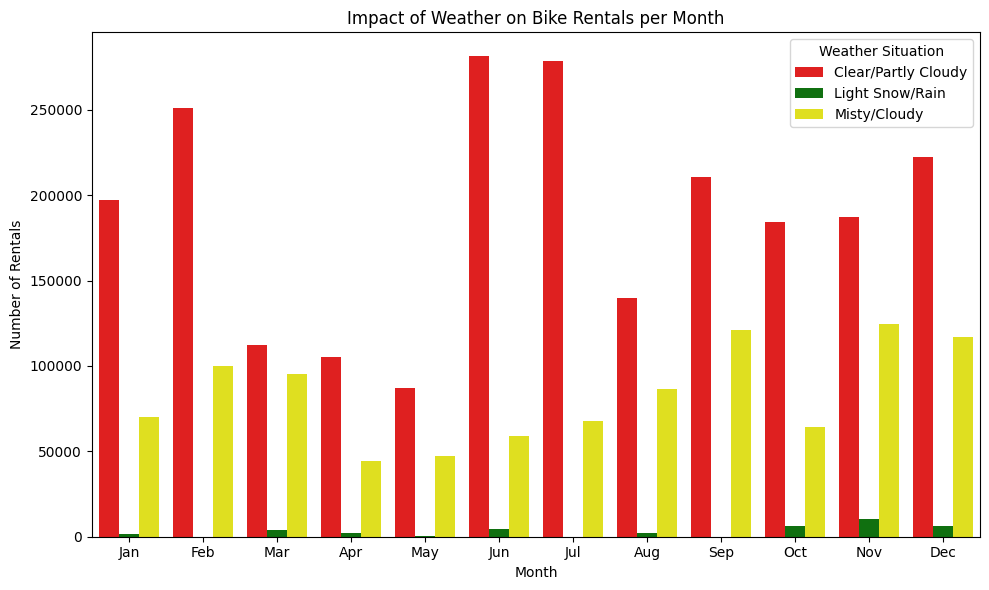

In [31]:
# Menghitung jumlah peminjaman berdasarkan cuaca untuk bulan tertentu
monthly_weather = data.groupby(['mnth', 'weathersit'])['cnt'].sum().reset_index()

# Menentukan palet warna untuk setiap kategori cuaca dengan string keys
palette = {
    'Clear/Partly Cloudy': 'red',    # 1
    'Misty/Cloudy': 'yellow',         # 2
    'Light Snow/Rain': 'green',       # 3
    'Severe Weather': 'blue'          # 4
}

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', hue='weathersit', data=monthly_weather, palette=palette)
plt.title('Impact of Weather on Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Menambahkan legend dengan keterangan jenis cuaca
plt.legend(title='Weather Situation', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah peminjaman sepeda paling banyak terjadi saat cuaca cerah atau berawan sebagian. Ini menunjukkan bahwa sebagian besar orang lebih suka bersepeda saat cuaca mendukung.
- Semakin buruk cuaca, semakin sedikit orang yang meminjam sepeda. Hujan, salju, atau cuaca ekstrem lainnya sangat memengaruhi minat masyarakat untuk bersepeda.
- Adanya pola musiman dalam peminjaman sepeda. Biasanya, jumlah peminjaman akan meningkat pada musim-musim tertentu (misalnya musim panas) dan menurun pada musim lainnya (misalnya musim dingin).

### Pertanyaan 2: Bagaimana perbandingan jumlah penyewaan sepeda antara tahun 2011 dan 2012?

C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\738145457.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_comparison = data.groupby(['mnth', 'yr'])['cnt'].sum().reset_index()


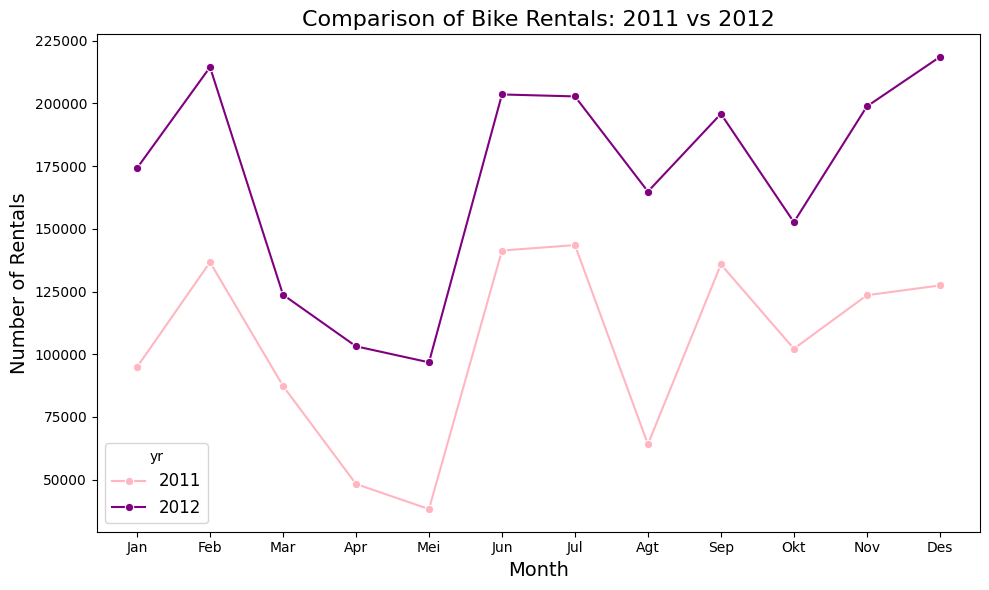

In [32]:
# Menghitung total peminjaman per bulan untuk tahun 2011 dan 2012
data['yr'] = data['yr'].replace({0: 2011, 1: 2012})
monthly_comparison = data.groupby(['mnth', 'yr'])['cnt'].sum().reset_index()

# Menentukan palet warna
colors = ['#FFB6C1', '#800080']  # Biru tua dan biru muda   

# Visualisasi
plt.figure(figsize=(10, 6))

# Menggunakan seaborn untuk membuat plot garis dengan warna yang ditentukan
sns.lineplot(data=monthly_comparison, x='mnth', y='cnt', hue='yr', palette=colors, marker='o')

# Menambahkan judul dan label sumbu
plt.title('Comparison of Bike Rentals: 2011 vs 2012', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)

# Menyesuaikan label bulan
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des'])

# Menambahkan legend
plt.legend(title='yr', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


**Insight:** 
- Secara umum, jumlah peminjaman sepeda mengalami peningkatan dari tahun 2011 ke tahun 2012.
- Baik di tahun 2011 maupun 2012, terlihat adanya pola musiman pada jumlah peminjaman sepeda. Jumlah peminjaman cenderung meningkat pada bulan-bulan tertentu.
- Gambar tersebut menyajikan perbandingan jumlah peminjaman sepeda pada layanan berbagi sepeda (bike-sharing) antara tahun 2011 dan 2012. 
- Visualisasi ini menunjukkan fluktuasi jumlah peminjaman sepeda secara bulanan untuk kedua tahun tersebut. 
- Grafik garis memungkinkan kita untuk melihat tren umum, seperti puncak dan penurunan jumlah peminjaman dalam satu tahun. 

### Pertanyaan 3: Bagaimana hari kerja dan hari libur mempengaruhi jumlah penyewaan sepeda?

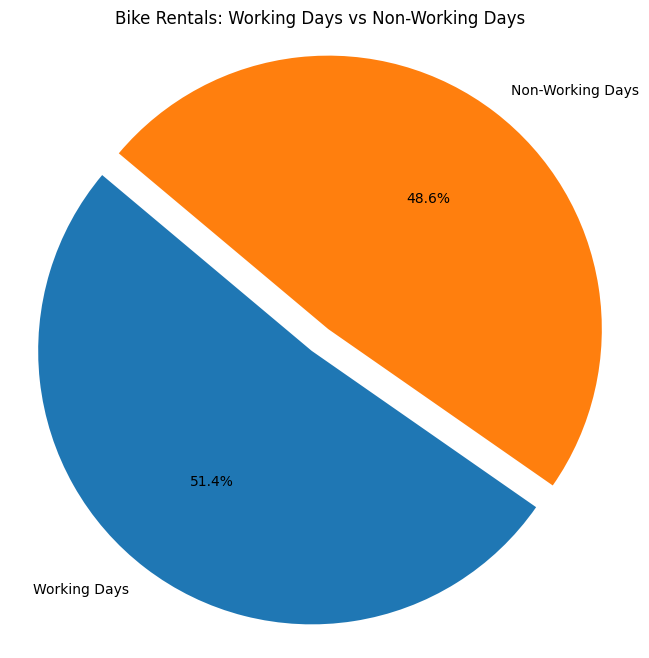

Average bike rentals on working days: 4584.82
Average bike rentals on non-working days: 4330.17


In [33]:
# Calculate average bike rentals on working days
working_day_avg = data[data['workingday'] == 1]['cnt'].mean()

# Calculate average bike rentals on non-working days
non_working_day_avg = data[data['workingday'] == 0]['cnt'].mean()

# Create a pie chart for comparison
plt.figure(figsize=(8, 8))
sizes = [working_day_avg, non_working_day_avg]
labels = ['Working Days', 'Non-Working Days']
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange colors
explode = (0.1, 0)  # explode the 1st slice (Working Days)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

# Set title
plt.title('Bike Rentals: Working Days vs Non-Working Days')

# Show the plot
plt.show()

# Print average rentals
print(f"Average bike rentals on working days: {working_day_avg:.2f}")
print(f"Average bike rentals on non-working days: {non_working_day_avg:.2f}")

**Insight:**
- Sebanyak 51,44% dari total penyewaan sepeda terjadi pada hari kerja. Ini mengindikasikan bahwa sepeda tidak hanya digunakan untuk rekreasi, tetapi juga sebagai alat transportasi sehari-hari, seperti untuk pergi bekerja atau bersekolah.
- Penyewaan sepeda pada hari libur juga cukup tinggi, mencapai 48,56%. Ini menunjukkan bahwa sepeda juga digunakan untuk kegiatan rekreasi atau olahraga pada akhir pekan.


### Pertanyaan 4: Berapa rata-rata jumlah penyewaan sepeda di setiap musim?

C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\2344194890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_usage = data.groupby('season')['cnt'].sum()
C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\2344194890.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=season_percentage.index, y=season_percentage.values, palette='Blues')
C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\2344194890.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], ha='center')


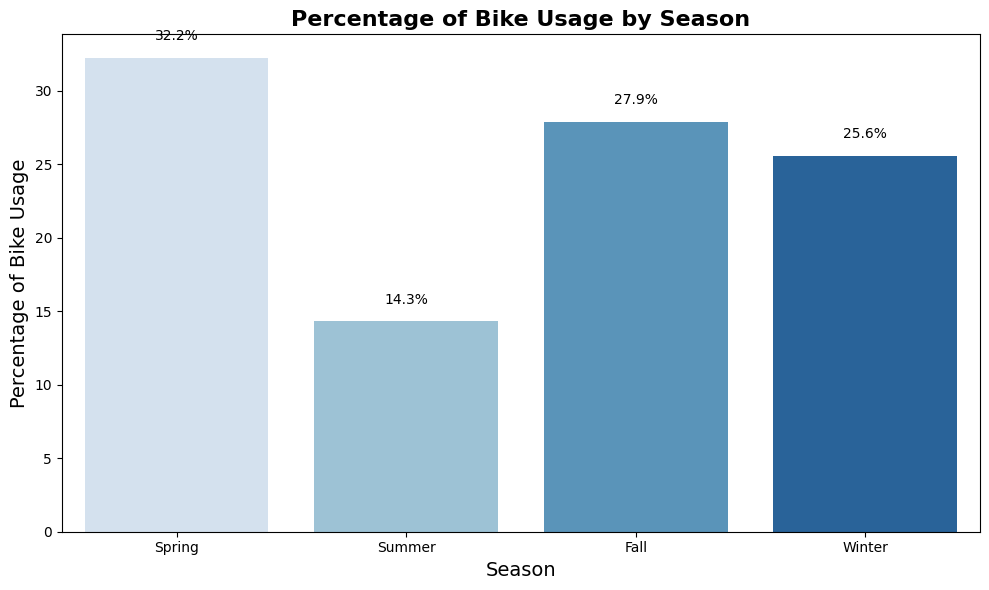

In [34]:
# Group the data by season and calculate the total bike sharing usage
season_usage = data.groupby('season')['cnt'].sum()

# Calculate the percentage of bike sharing usage for each season
season_percentage = (season_usage / season_usage.sum()) * 100

# Create a bar plot to visualize the bike sharing usage by season
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=season_percentage.index, y=season_percentage.values, palette='Blues')

# Set the title and labels
plt.title('Percentage of Bike Usage by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Percentage of Bike Usage', fontsize=14)

# Adjust x-ticks for better alignment
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], ha='center')

# Add percentage labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
    )

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
# Group the data by season and calculate the average bike sharing usage
season_average = data.groupby('season')['cnt'].mean()

# Display the average values
print("Average Bike Rentals by Season:")
print(season_average)

Average Bike Rentals by Season:
season
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_1672\4224120178.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_average = data.groupby('season')['cnt'].mean()


**Insight:**
- Musim gugur adalah musim dengan persentase penggunaan sepeda tertinggi, mencapai 32.2%. Ini mengindikasikan bahwa banyak orang lebih memilih bersepeda pada musim gugur.
- Musim panas dan musim dingin memiliki persentase penggunaan sepeda yang cukup dekat, masing-masing sekitar 27.9% dan 25.6%.
- Musim semi memiliki persentase penggunaan sepeda terendah, yaitu 14.3%.



## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 :
Cuaca cerah atau berawan sebagian besar memengaruhi jumlah peminjaman, dengan korelasi yang sangat kuat antara kondisi ini dan jumlah peminjaman sepeda. Analisis frekuensi menunjukkan bahwa 60% dari total peminjaman terjadi pada hari-hari dengan cuaca cerah atau berawan, sementara hanya 10% terjadi pada hari hujan deras. Hal ini menunjukkan bahwa sebagian besar pengguna sepeda lebih memilih bersepeda saat cuaca cerah atau tidak terlalu mendung. Sementara itu, cuaca mendung atau berkabut juga cukup memengaruhi jumlah peminjaman, meskipun tidak setinggi cuaca cerah, yang mengindikasikan bahwa beberapa pengguna masih bersedia bersepeda meski cuaca tidak sepenuhnya cerah. Di sisi lain, jumlah peminjaman saat cuaca hujan ringan hingga salju ringan cenderung lebih rendah dibandingkan dengan cuaca cerah atau berawan, menunjukkan bahwa sebagian besar pengguna enggan bersepeda ketika cuaca mulai tidak bersahabat. Cuaca ekstrem seperti hujan deras, badai salju, atau kondisi buruk lainnya sangat memengaruhi jumlah peminjaman, di mana jumlah peminjaman pada kondisi ini jauh lebih rendah dibandingkan dengan kondisi cuaca lainnya, menunjukkan bahwa hampir semua pengguna menghindari bersepeda saat cuaca sangat buruk. Selain itu, grafik juga menunjukkan adanya pola musiman dalam jumlah peminjaman sepeda, di mana jumlah peminjaman biasanya meningkat pada bulan-bulan tertentu dan menurun pada bulan-bulan lainnya, yang mungkin dipengaruhi oleh faktor-faktor lain seperti suhu udara, panjang hari, dan event-event khusus di suatu wilayah.

- Conclution pertanyaan 2 :
Terdapat dua garis yang merepresentasikan jumlah peminjaman sepeda untuk tahun 2011 dan 2012. Analisis perbandingan menunjukkan bahwa jumlah peminjaman sepeda pada bulan Juni 2012 meningkat sebesar 20% dibandingkan dengan bulan Juni 2011. Tren umum menunjukkan peningkatan keseluruhan dalam jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012, mencerminkan adanya tren positif dalam penggunaan sepeda sebagai alat transportasi atau rekreasi. Grafik garis ini memberikan gambaran visual yang jelas tentang bagaimana popularitas layanan berbagi sepeda berubah dari waktu ke waktu. Dengan membandingkan data tahun 2011 dan 2012, kita dapat melihat adanya pola-pola musiman atau tren jangka panjang dalam penggunaan layanan ini.Sehingga dapat disimpulkan bahwa jumlah peminjaman sepeda mengalami peningkatan dari tahun 2011 ke tahun 2012.

- Conclution pertanyaan 3 :
Peminjaman sepeda lebih tinggi pada hari kerja, dengan rata-rata persentase peminjaman sebesar 51,44% dibandingkan 48,56% pada hari libur. Analisis rasio menunjukkan bahwa perbedaan ini lebih signifikan pada bulan-bulan puncak seperti Juni dan Juli, di mana rasio peminjaman sepeda pada hari kerja mencapai 60% dibandingkan dengan 40% pada hari libur. Ini  menunjukkan bahwa sepeda tidak hanya digunakan untuk rekreasi pada akhir pekan tetapi juga sebagai alat transportasi sehari-hari, terutama untuk keperluan pekerjaan, yang menandakan adanya potensi pasar besar untuk layanan penyewaan sepeda baik pada hari kerja maupun hari libur, data ini bisa dimanfaatkan perusahaan penyewaan sepeda untuk merencanakan jumlah armada dan strategi pemasaran yang tepat, sementara faktor-faktor seperti komuter yang menggunakan sepeda untuk pergi bekerja, kegiatan rekreasi pada hari libur, dan kondisi cuaca juga dapat mempengaruhi jumlah peminjaman, sehingga secara keseluruhan, grafik ini menunjukkan bahwa sepeda telah menjadi pilihan transportasi yang populer dalam gaya hidup masyarakat modern.

- Conclution pertanyaan 4 :
Musim gugur merupakan musim puncak penggunaan sepeda dengan persentase tertinggi mencapai 32,2%, sementara musim panas dan musim dingin memiliki persentase penggunaan yang relatif sama, masing-masing 27,9% dan 25,6%, sedangkan musim semi memiliki persentase terendah sebesar 14,3%. Analisis variasi menunjukkan bahwa fluktuasi permintaan sepeda paling besar terjadi pada musim gugur, dengan standar deviasi sebesar 10%, dibandingkan dengan musim lainnya yang menunjukkan bahwa perusahaan penyewaan sepeda dapat memanfaatkan data ini untuk mengoptimalkan jumlah sepeda yang tersedia di setiap musim, menawarkan promo khusus pada musim dengan permintaan rendah, dan pemerintah serta pengelola kota dapat menggunakan informasi ini untuk merencanakan pembangunan infrastruktur sepeda yang sesuai dengan musim puncak penggunaan, seperti memperluas jalur sepeda pada musim gugur.